# Capstone Project - 911 Calls

For this capstone project, i will try to analyze data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert)
This data contains:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [1]:
#importing library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#ignore warning
import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [3]:
#read 911 csv files from folder
df = pd.read_csv('911.csv')

In [4]:
#Checking data head
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
#Checking the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
#We know that timestamp dtype is object, so we are going to change it into date-time format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [7]:
#Checking null data
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [8]:
#Handling missing values by dropna() function
df2 = df.dropna()
#resetting index after using dropna()
df2 = df2.reset_index(drop = True)
df2.isnull().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

### Top 5 zipcode in 911 calls

In [9]:
df2['zip'].value_counts().head()

19401.0    6977
19464.0    6641
19403.0    4854
19446.0    4745
19406.0    3173
Name: zip, dtype: int64

From the information above, we can see top 5 zipcode that contact 911

### Top 5 title and title categories

In [10]:
df2['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    19525
Traffic: DISABLED VEHICLE -     5764
Fire: FIRE ALARM                5134
EMS: RESPIRATORY EMERGENCY      4810
EMS: CARDIAC EMERGENCY          4686
Name: title, dtype: int64

In [11]:
x = df2['title'].nunique()
print('there is {} unique title in 911 calls'.format(x))

there is 107 unique title in 911 calls


Here, we know that there are 3 categories of 911 Calls, there is Emergency Medical Services(EMS), Fire, and Traffic
We are going to add that information into new features called categories

In [12]:
df2['categories'] = df2['title'].apply(lambda x : x.split(':')[0])
df2

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,categories
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
...,...,...,...,...,...,...,...,...,...,...
86571,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
86572,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
86573,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
86574,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


### Top 5 township for 911 Calls

In [13]:
df2['twp'].value_counts().head()

LOWER MERION    7202
ABINGTON        5675
NORRISTOWN      5610
POTTSTOWN       4029
CHELTENHAM      3942
Name: twp, dtype: int64

## Data Visualization

### Checking categories with most accident

In [14]:
#set grid become whitegrid using sns
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Categories')

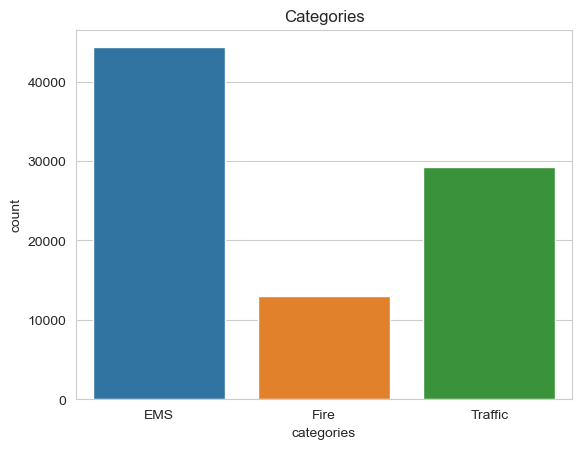

In [15]:
sns.countplot(df2['categories'])
plt.title('Categories')

We can see that most of the accident are EMS followed by Traffic

### Checking timeStamp with most accident (month,day,hour)

In [16]:
df2['hour'] = df2['timeStamp'].apply(lambda x : x.hour)
df2['month'] = df2['timeStamp'].apply(lambda x : x.month)
df2['day'] = df2['timeStamp'].apply(lambda x : x.dayofweek)
df2.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,categories,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,3


In [17]:
#transforming day(0-6) integer into string(monday,tuesday, etc)
dmap = {0 : 'monday', 1 : 'tuesday', 2 : 'wednesday', 3 : 'thursday', 4 : 'friday', 5 : 'saturday', 6 : 'sunday'}
df2['day'] = df2['day'].map(dmap)
df2['day']

0         thursday
1         thursday
2         thursday
3         thursday
4         thursday
           ...    
86571    wednesday
86572    wednesday
86573    wednesday
86574    wednesday
86575    wednesday
Name: day, Length: 86576, dtype: object

<AxesSubplot:xlabel='day', ylabel='count'>

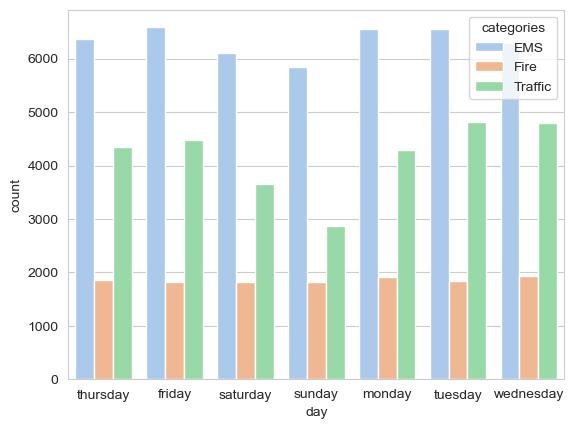

In [18]:
sns.countplot(df2['day'], hue= df2['categories'], palette='pastel')

<AxesSubplot:xlabel='hour', ylabel='count'>

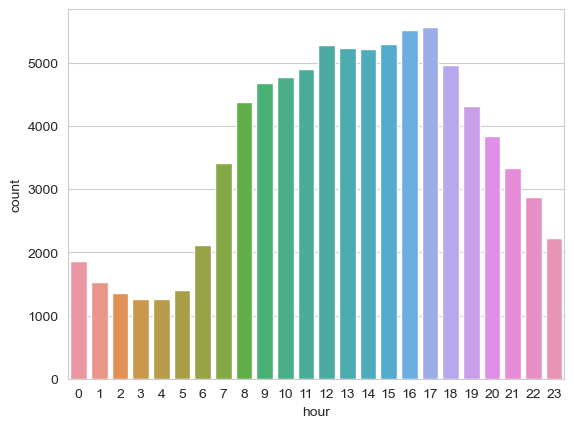

In [19]:
sns.countplot(df2['hour'])

We can see that most of the accident happens during working hour (8 am - 8pm)

<AxesSubplot:xlabel='month', ylabel='count'>

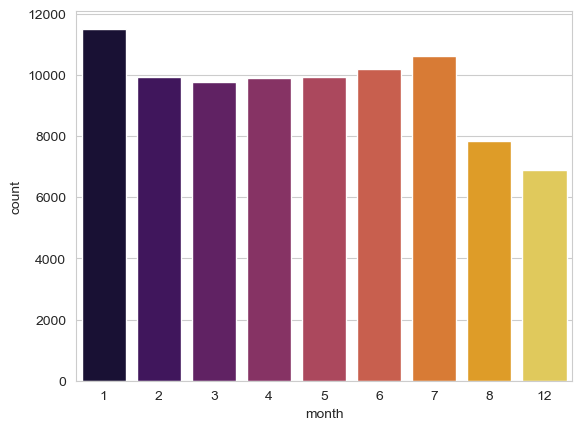

In [20]:
sns.countplot(df2['month'], palette = 'inferno')

<AxesSubplot:xlabel='month'>

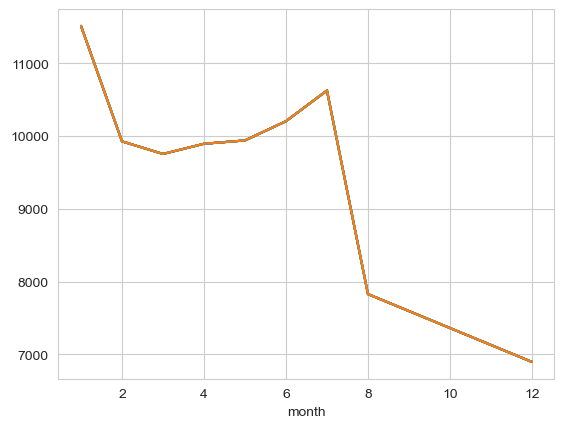

In [21]:
df2.groupby('month').count().plot(legend = None)

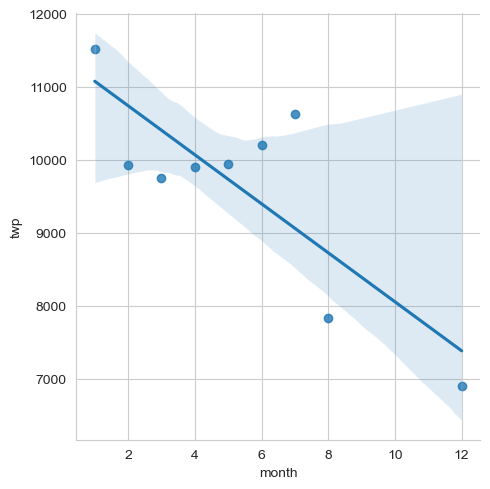

In [22]:
sns.lmplot(x='month',y='twp',data=df2.groupby('month').count().reset_index())

Based on the graph the graph above, we can see that the trend of 911 calls moving downward in the end of the year

In [23]:
df2['date'] = df2['timeStamp'].apply(lambda x : x.date())
date_plot = df2.groupby('date').count()
date_plot.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,categories,hour,month,day
date,,,,,,,,,,,,,
2015-12-10,99,99,99,99,99,99,99,99,99,99,99,99,99
2015-12-11,332,332,332,332,332,332,332,332,332,332,332,332,332
2015-12-12,333,333,333,333,333,333,333,333,333,333,333,333,333
2015-12-13,280,280,280,280,280,280,280,280,280,280,280,280,280
2015-12-14,386,386,386,386,386,386,386,386,386,386,386,386,386


<AxesSubplot:xlabel='date'>

<Figure size 640x480 with 0 Axes>

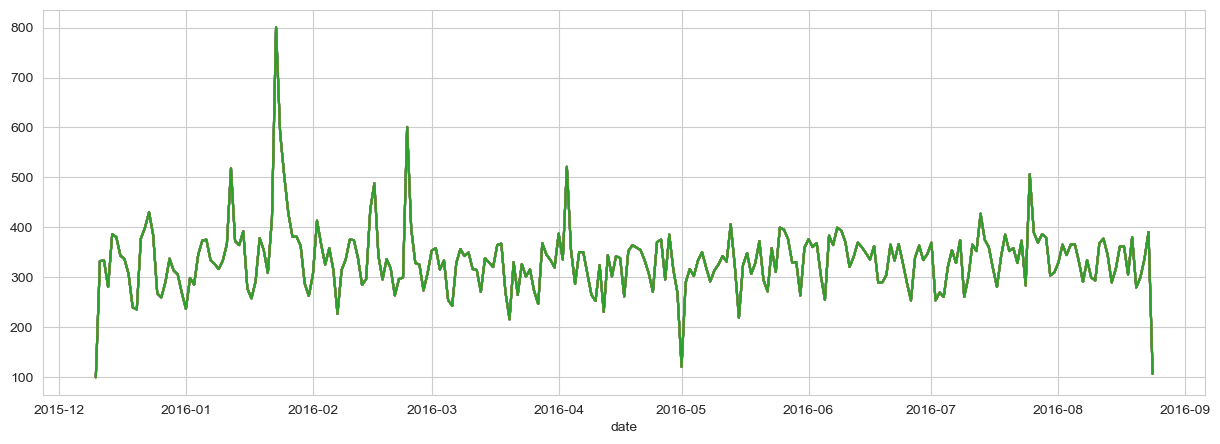

In [24]:
plt.tight_layout()
date_plot.plot(legend = None, figsize=(15,5))

We can see that there is a lot a upward spike between 2016 january and 2016 february

Text(0.5, 1.0, 'Fire - 911 Calls')

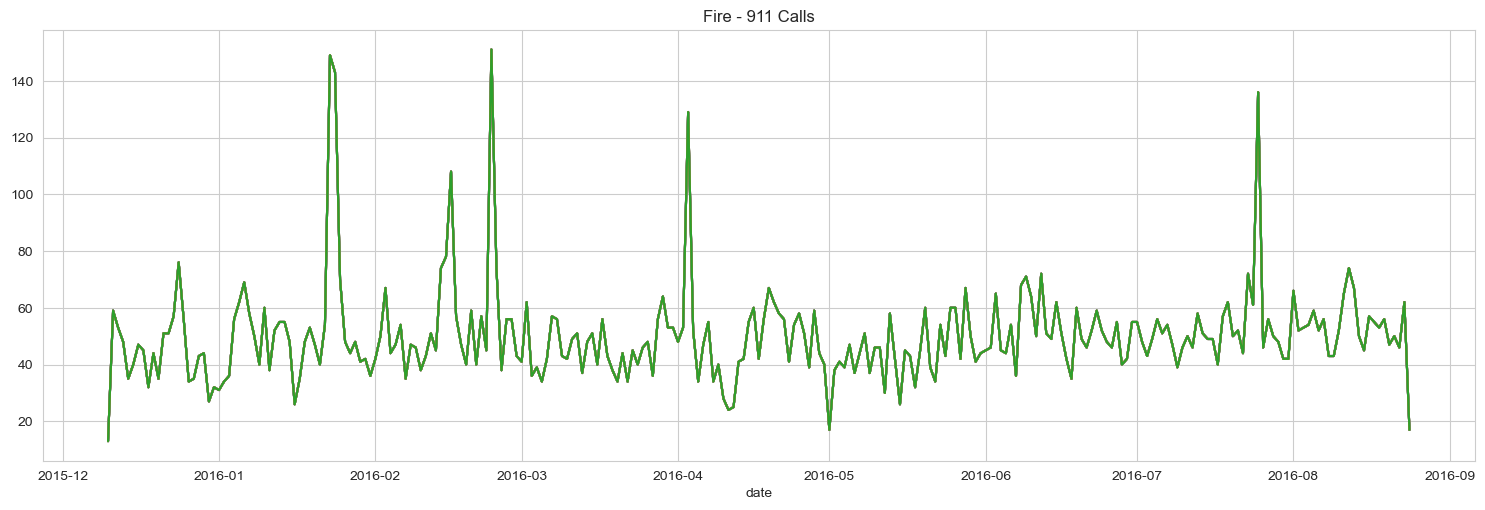

In [25]:
#here i am plottin a line graph about 911 fire call based on date time
df2[df2['categories'] == 'Fire'].groupby('date').count().plot(legend = None, figsize = (15,5))
plt.tight_layout()
plt.title('Fire - 911 Calls')

Text(0.5, 1.0, 'EMS - 911 Calls')

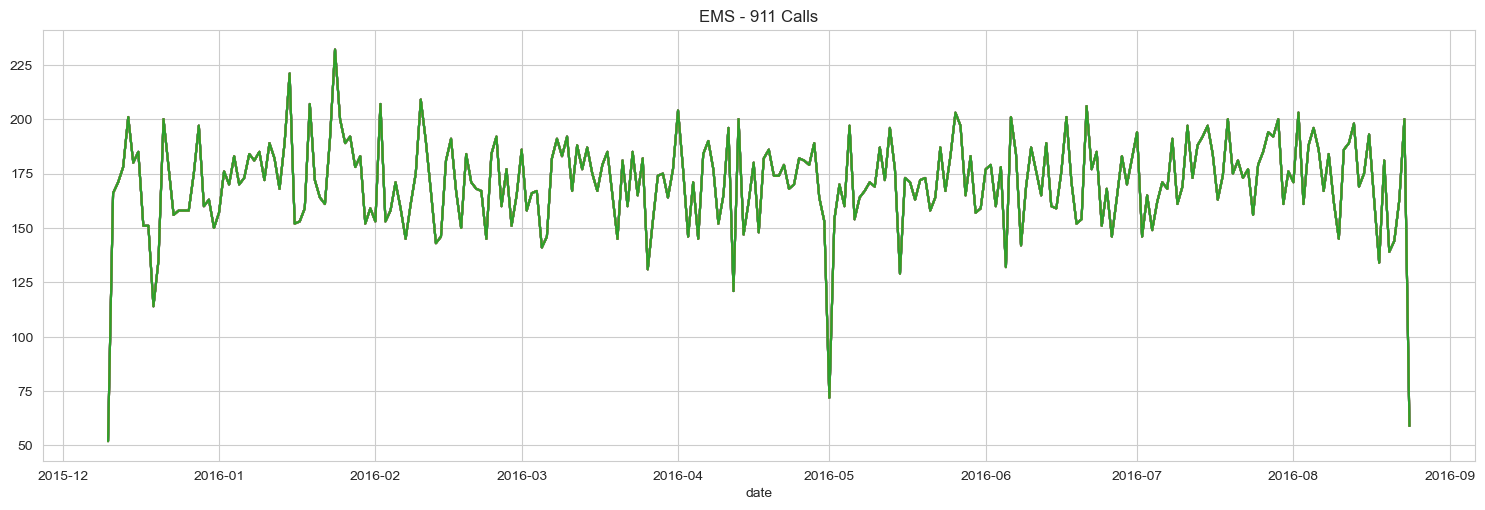

In [26]:
#here i am plottin a line graph about 911 EMS call based on date time
df2[df2['categories'] == 'EMS'].groupby('date').count().plot(legend = None, figsize = (15,5))
plt.tight_layout()
plt.title('EMS - 911 Calls')

Text(0.5, 1.0, 'Traffic - 911 Calls')

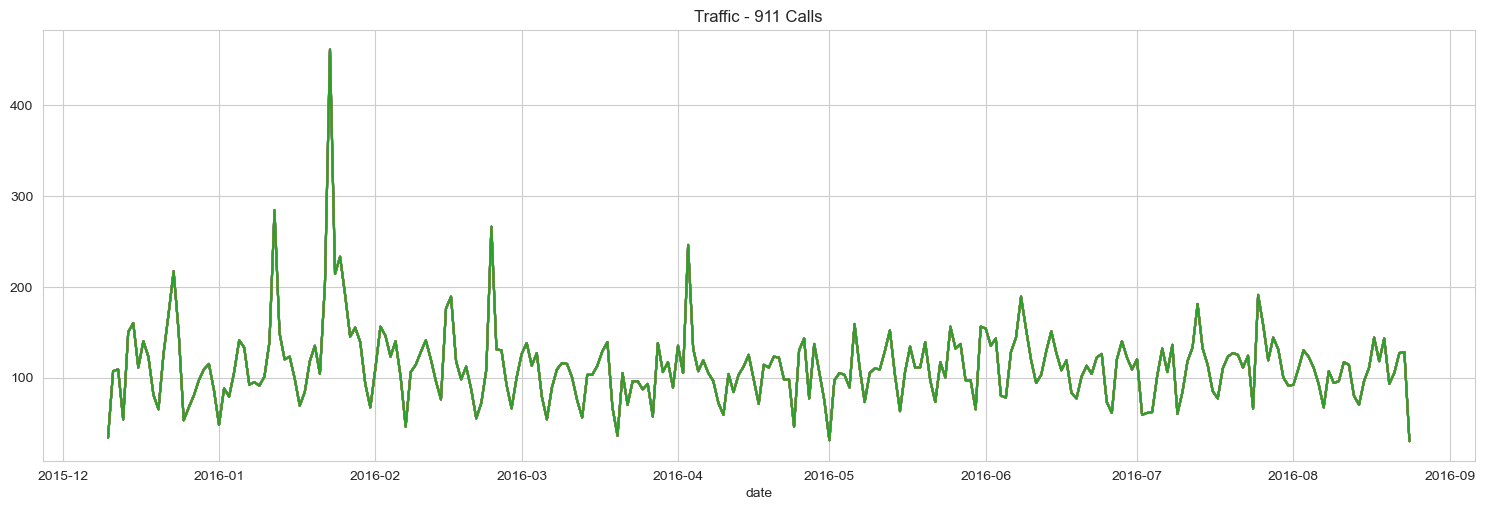

In [27]:
#here i am plottin a line graph about 911 Traffic call based on date time
df2[df2['categories'] == 'Traffic'].groupby('date').count().plot(legend = None, figsize = (15,5))
plt.tight_layout()
plt.title('Traffic - 911 Calls')